## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets

In [2]:
plt.style.use('seaborn')

## Load Datasets

In [4]:
iris = datasets.load_iris()

## Explore Data

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Prepare Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = iris.data[:, :2]
y = iris.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

## Train Model

In [11]:
svm_model = svm.SVC(kernel='rbf', C=1, gamma='auto')

In [12]:
svm_model.fit(X_train, y_train)

SVC(C=1, gamma='auto')

## Evaluate Model

In [13]:
svm_score = svm_model.score(X_test, y_test)

In [14]:
print('Model Accuracy:', svm_score)

Model Accuracy: 0.7777777777777778


D:\Users\p6119678\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


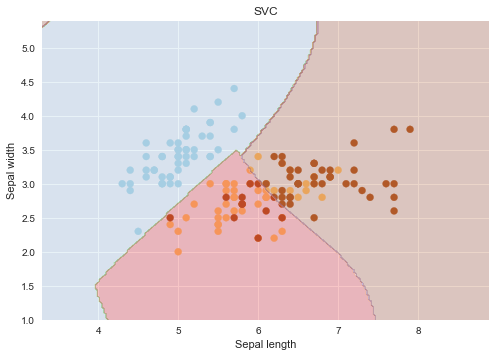

In [17]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max/x_min)/100
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.title('SVC')

plt.subplot(1,1,1)
Z= svm_model.predict(np.c_[xx.ravel(),yy.ravel()])
Z= Z.reshape(xx.shape)

plt.contourf(xx,yy,Z, cmap=plt.cm.Paired, alpha=0.25)

## Save Model

In [18]:
import pickle

In [19]:
#Save to file
pkl_filename = "svm_model.pkl"

In [20]:
with open(pkl_filename,'wb') as file:
    pickle.dump(svm_model,file)

## Load Model

In [21]:
#Load Modelfrom pickle file
with open(pkl_filename,'rb') as file:
    svm_model = pickle.load(file)

In [22]:
svm_score = svm_model.score(X_test,y_test)

In [23]:
print('Model Accuracy:', svm_score)

Model Accuracy: 0.7777777777777778
